In [1]:
#import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/twitter-sentiment-anaylsis/train_2kmZucJ.csv
/kaggle/input/twitter-sentiment-anaylsis/test_oJQbWVk.csv


In [3]:
train = pd.read_csv("../input/twitter-sentiment-anaylsis/train_2kmZucJ.csv")
test = pd.read_csv("../input/twitter-sentiment-anaylsis/test_oJQbWVk.csv")

Given the tweets from customers about various tech firms who manufacture and sell mobiles, computers, laptops, etc, the task is to identify if the tweets have a negative sentiment towards such companies or products.

let us now view the twitter data

In [4]:
train.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


This train data has 7920 rows and 3 columns and test data has 1953 rows and 2 columns(id and tweet)

train data columns are :
*     id
*     label (target which we have to predict )
*     tweet

# DATA PREPROCESSING

In [5]:
train.tweet[:20]

0     #fingerprint #Pregnancy Test https://goo.gl/h1...
1     Finally a transparant silicon case ^^ Thanks t...
2     We love this! Would you go? #talk #makememorie...
3     I'm wired I know I'm George I was made that wa...
4     What amazing service! Apple won't even talk to...
5     iPhone software update fucked up my phone big ...
6     Happy for us .. #instapic #instadaily #us #son...
7     New Type C charger cable #UK http://www.ebay.c...
8     Bout to go shopping again listening to music #...
9     Photo: #fun #selfie #pool #water #sony #camera...
10    hey #apple when you make a new ipod dont make ...
11    Ha! Not heavy machinery but it does what I nee...
12    Contemplating giving in to the iPhone bandwago...
13    I just made another crazy purchase lol my theo...
14    @shaqlockholmes @sam_louise1991 the battery is...
15    From #DeepEllum towards #downtown #Dallas. #Bi...
16    Like and Share if you want this 3D Phone Case ...
17    Go crazy !! #iphonesia, #iphone, #instagoo

we can see that our data is unstructured and for better analysis we first need to structure these tweets, remove the unwanted words, replace the misspelled words with the correct ones, replace the abriviation with full words.

Most profane and vulgar terms in the tweets have been replaced with “$&@*#”. Our task is to replace these terms with 'bad' .The reason why we cannot remove these terms is because these words are frequantly used and can help us determine negative sentiment correctly.

let us see how to replace these terms

In [6]:
badword='$&@*#'   #we initialize a variable which contain this profane term
tt=train['tweet'].apply(lambda x:x.split()) #tokenize the tweet text

In [7]:
tt[:5]

0    [#fingerprint, #Pregnancy, Test, https://goo.g...
1    [Finally, a, transparant, silicon, case, ^^, T...
2    [We, love, this!, Would, you, go?, #talk, #mak...
3    [I'm, wired, I, know, I'm, George, I, was, mad...
4    [What, amazing, service!, Apple, won't, even, ...
Name: tweet, dtype: object

In [8]:
z=[]   #create a list 
for i in tt: #run through the loop 
    l=[]
    for j in i:
        if j.__contains__('$&@*#'):     #and compare each and every word to badword
            j=j.replace(j,'bad')        #if found then replace that word with 'bad'
        l.append(j)                     #append it into a list
    z.append(l)                         #append the inner list to main list inorder to create list of list

In [9]:
train['tweets']=z  #create a new column for the processed tweets

In [10]:
print(train.tweet[26])
print(train.tweets[26])
#we can see that the first term from tweet feature is replaced with bad in tweets feature

$&@*# my ipod is all messed up and i haven't done nothing to it #$&@*# #MyLoss ! #Apple
['bad', 'my', 'ipod', 'is', 'all', 'messed', 'up', 'and', 'i', "haven't", 'done', 'nothing', 'to', 'it', 'bad', '#MyLoss', '!', '#Apple']


In [11]:
l=[]
for i in train['tweets']:
    l.append(" ".join(i))
train['tweet_r']=l  #create new feature in which we stitch back the tokenized tweets

# DATA CLEANING
we observed that tweet data has links,punctuations and numbers. cleaning the raw data is important 
* clean URL links
* remove twitter handle (@user)
* remove special characters and number

note: we won't remove hashtags because it helps better prediction
 
if we have text as 'MY LOVELY CARING FRIEND #NOTANYMORE #FOE #ENEMY'. As a human we know that this tweet is negative but how to make machine know? 
 
 write your opinion in the comment :)

In [12]:
def process_tweets(train):
    train['mail_tweets']=train['tweet_r'].str.replace('https?://[A-Za-z0-9./]+',' ')#replace all the url links
    train['clean_tweets']=train['tweet_r'].str.replace('[^a-zA-Z]',' ')#replacing special characters with space
process_tweets(train)

In [13]:
train.head() #our cleaned train data.

,id,label,tweet,tweets,tweet_r,mail_tweets,clean_tweets
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,"[#fingerprint, #Pregnancy, Test, https://goo.g...",#fingerprint #Pregnancy Test https://goo.gl/h1...,#fingerprint #Pregnancy Test #android #apps ...,fingerprint Pregnancy Test https goo gl h ...
1,2,0,Finally a transparant silicon case ^^ Thanks t...,"[Finally, a, transparant, silicon, case, ^^, T...",Finally a transparant silicon case ^^ Thanks t...,Finally a transparant silicon case ^^ Thanks t...,Finally a transparant silicon case Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...,"[We, love, this!, Would, you, go?, #talk, #mak...",We love this! Would you go? #talk #makememorie...,We love this! Would you go? #talk #makememorie...,We love this Would you go talk makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...,"[I'm, wired, I, know, I'm, George, I, was, mad...",I'm wired I know I'm George I was made that wa...,I'm wired I know I'm George I was made that wa...,I m wired I know I m George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...,"[What, amazing, service!, Apple, won't, even, ...",What amazing service! Apple won't even talk to...,What amazing service! Apple won't even talk to...,What amazing service Apple won t even talk to...


In [14]:
train.drop(columns=['tweet','tweets','id','tweet_r','mail_tweets'],inplace=True)
#we will drop columns except 'clean_tweets' and 'label'

# DATA ANALYSIS


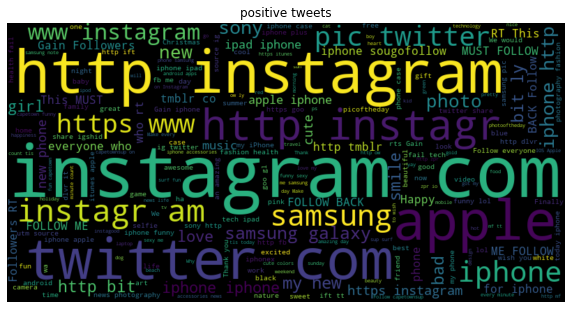

In [15]:
#Visualizing all the positive tweets using wordcloud plot.
positive=' '.join([text for text in train['clean_tweets'][train['label']==0]])
wordcloud=WordCloud(width=800,height=400,random_state=21,max_font_size=110).generate(positive)
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.title('positive tweets')
plt.show()

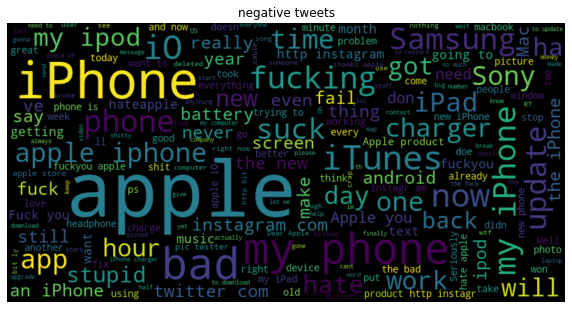

In [16]:
#Visualizing all the negative tweets using wordcloud plot.
positive=' '.join([text for text in train['clean_tweets'][train['label']==1]])
wordcloud=WordCloud(width=800,height=400,random_state=21,max_font_size=110).generate(positive)
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.title('negative tweets')
plt.show()

we can observe that negative tweets have iphone in common and positive tweets have samsung in common.why? 😂

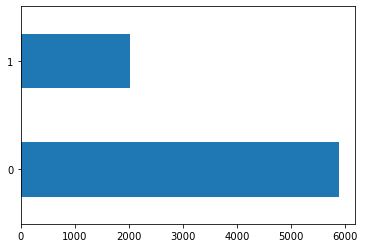

In [17]:
train['label'].value_counts().plot(kind='barh')

here we observe that negative tweets are approx 25% of the total tweets.for better classification we can use SMOTE(Synthetic Minority Over-sampling Technique) for imbalanced data. here i will proceed without using the SMOTE techique.

# EXTRACT FEATURES

To analyse data we need to convert the data into features.We can construct features using
* Bag of words
* TF-IDF
* Word2vec

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2,max_features=1000, stop_words='english') 
bow = bow_vectorizer.fit_transform(train['clean_tweets']) 
bow.shape

(7920, 1000)

In [19]:
tdf_vectorize=TfidfVectorizer(max_df=0.90, min_df=2,max_features=1000)
tfidf = tdf_vectorize.fit_transform(train['clean_tweets'])
tfidf.shape

(7920, 1000)

# MODEL BUILDING
we will use logistic regression . we will first split our into train and validation set.

In [20]:
from sklearn.linear_model import LogisticRegression #import LinerRegression from sklearn
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score

In [21]:
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(bow,train['label'],random_state=42,test_size=0.3)

In [22]:
xtrain_tdf, xvalid_tdf, ytrain, yvalid = train_test_split(tfidf, train['label'],random_state=42,test_size=0.3)

In [23]:
#using Bag of word features
lr=LogisticRegression()
lr.fit(xtrain_bow,ytrain)
lr.score(xvalid_bow,yvalid)

0.8762626262626263

In [24]:
#using TF-IDF features
lr=LogisticRegression()
lr.fit(xtrain_tdf,ytrain)
lr.score(xvalid_tdf,yvalid)

0.8880471380471381

For this classification task the metric used for evaluating the performance of classification model would be weighted F1-Score.

we have to perform similar preprocessing and cleaning techinique for test data. You can combine the train and test data. 

try out different models like random forest classifier,support vector machine and XGboost.

After performing similar process for test data and predicting the values for test data. F1 score was *0.7661612130885873*.

Thank you!